<a href="https://colab.research.google.com/github/SantiagoMerlo/SI-PARCIAL-2/blob/main/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consigna Parcial
#### Se pide generar el mejor modelo que considere utilizando  una  SVM y otro basado en Redes Neuronales de Backpropagation via tensor flow:
##### Evaluar la posibilidad de definir entre tratamiento adecuado (KtVequilibrado > 1.2) del tratamiento inadecuado (KtV equilibrado <= 1.2) Debe realizar las métricsa de comparacion pertinentes y aplicar los conceptos del paper ClinicalNephr. 

In [64]:
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

In [2]:
style.use("ggplot")
plt.rcParams['figure.figsize'] = (16,9)

In [52]:
!wget "https://raw.githubusercontent.com/SantiagoMerlo/SI-PARCIAL-2/main/dataset.csv"

--2021-05-22 14:03:19--  https://raw.githubusercontent.com/SantiagoMerlo/SI-PARCIAL-2/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4424 (4.3K) [text/plain]
Saving to: ‘dataset.csv.1’

dataset.csv.1       100%[===================>]   4.32K  --.-KB/s    in 0s      

2021-05-22 14:03:19 (36.2 MB/s) - ‘dataset.csv.1’ saved [4424/4424]



In [53]:
df = pd.read_csv("./dataset.csv", sep=",")
df.sample(3)

,Upre,U120,Upos,PP,UF,Ueq,centro,Ktveq
17,220,144,62,60.5,3.1,89.0,1,1.130169
24,158,83,60,71.9,0.5,61.0,1,1.058006
116,165,95,60,79.0,1.8,75.0,0,0.921527


### Parametros

In [51]:
TEST_SIZE = 0.25
SEED = 2019

# Redes

In [6]:
df["TratCorrect"] = df["Ktveq"].apply(lambda x: 1 if x > 1.2 else 0)

In [8]:
labels = ["Upre", "Upos",	"PP","U120",	"UF",	"Ueq"]
INPUT_SIZE = (len(labels),)

#### Normalizacion de los datos

In [65]:
x = df[labels].values
x_scaled = MinMaxScaler().fit_transform(x)
df[labels] = pd.DataFrame(x_scaled)

In [66]:
df.describe()

,Upre,U120,Upos,PP,UF,Ueq,centro,Ktveq
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.474200,0.446375,0.441456,0.423140,0.457874,0.454254,0.456693,1.089479
std,0.187843,0.206668,0.238822,0.218925,0.198493,0.215911,0.500094,0.289227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459759
25%,0.345745,0.310345,0.266234,0.259375,0.333333,0.312500,0.000000,0.888222
50%,0.462766,0.422414,0.376623,0.420000,0.450000,0.423913,0.000000,1.067816
75%,0.571809,0.586207,0.610390,0.576875,0.575000,0.608696,1.000000,1.246382
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.805728


In [13]:
X, Y = df[labels], df["TratCorrect"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


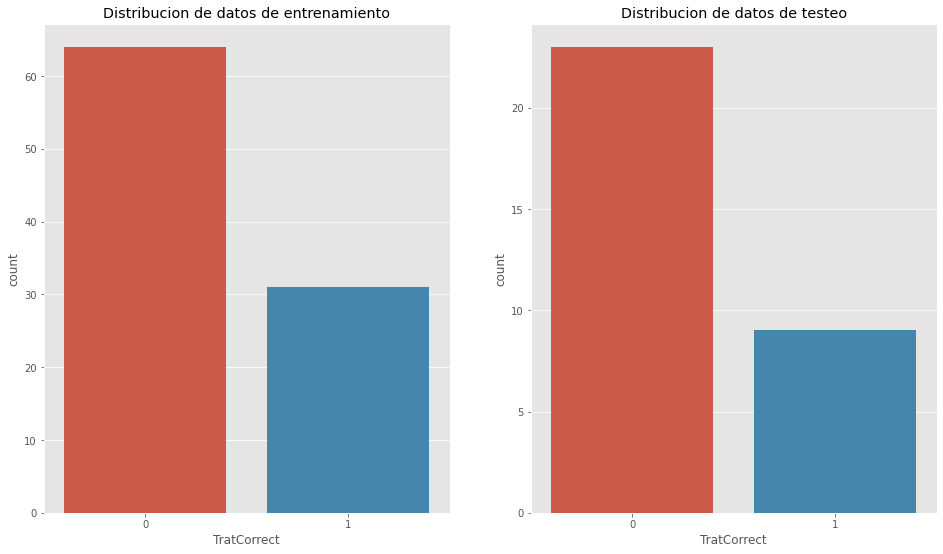

In [67]:
fig, ax =plt.subplots(1,2)
ax[0].set_title("Distribucion de datos de entrenamiento")
sns.countplot(Y_train, ax=ax[0])
ax[1].set_title("Distribucion de datos de testeo")
sns.countplot(Y_test, ax=ax[1])

In [54]:
model = keras.Sequential([
          Input(INPUT_SIZE),
          Dense(INPUT_SIZE[0],"relu"),
          Dropout(0.2),
          Dense(2,"relu"),
          Dense(1,"sigmoid")
        ])
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=250, verbose=0)

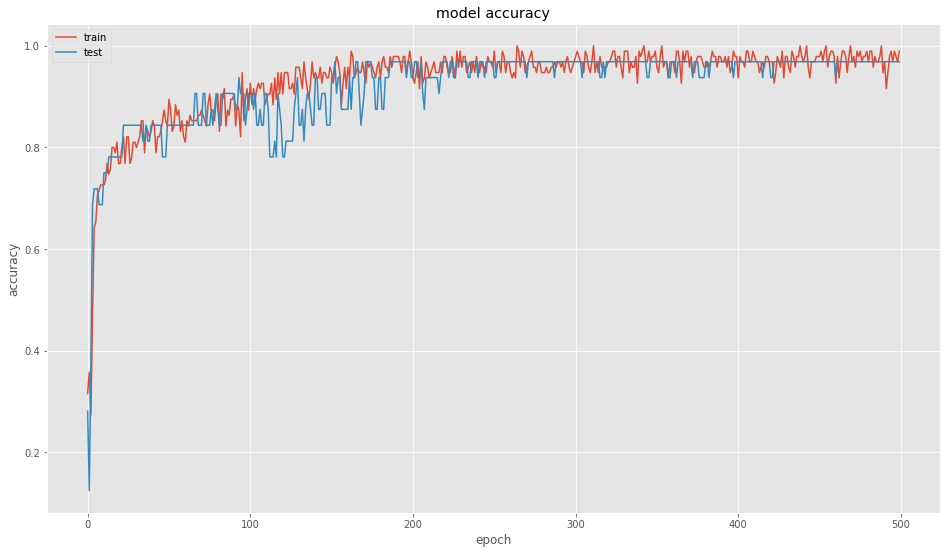

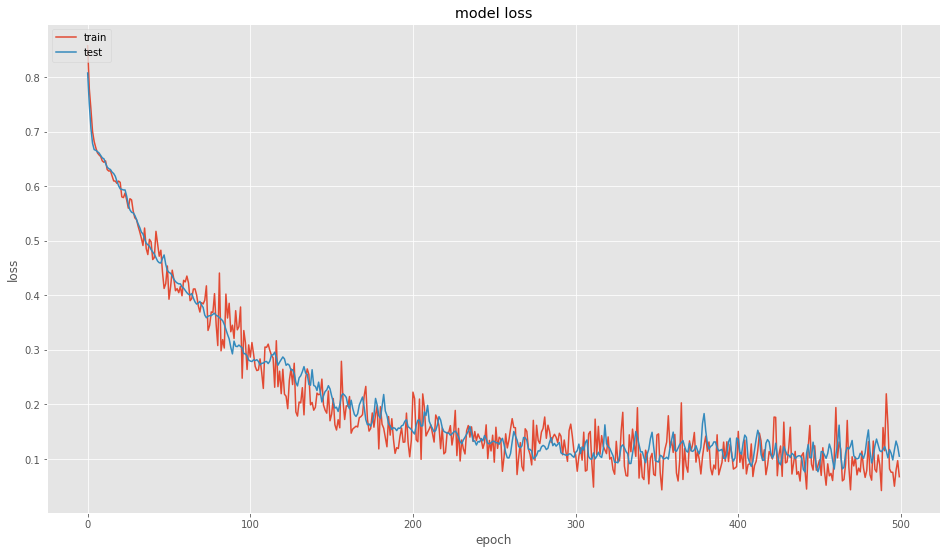

In [57]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_accuracy(history)

In [58]:
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 14ms/step - loss: 0.1049 - accuracy: 0.9688
test loss, test acc: [0.10493594408035278, 0.96875]


In [48]:
from sklearn.metrics import confusion_matrix

In [61]:
y_pred = np.around(y_pred)
y_pred = model.predict(X_test)

In [62]:
matrix = confusion_matrix(Y_test, y_pred)
pd.DataFrame(matrix)

,0,1
0,23,0
1,1,8
